In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = 'none'
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()

from tqdm import tqdm
import napari
import skimage as sk
import pandas as pd
import os

In [ ]:
na_50_files = Path('wt_tom20_gyp_day1_50mm _2025_05_13__15_19_27_Airyscan_Processing.czi')
na_500_files = Path('wt_tom20_gyp_day1_500mmsaltplate_6hr_pt_2025_05_13__14_48_27_Airyscan_Processing.czi')


In [ ]:
na_50_czi = CziFile(na_50_files)
na_500_czi = CziFile(na_500_files)

In [ ]:
na_50_czi.size

In [ ]:
test_slice = np.squeeze(na_50_czi.read_image(S=0,Z=50)[0])

In [ ]:
test_slice.shape

In [ ]:
test_img.shape

In [ ]:
viewer = napari.view_image(test_slice)

In [ ]:
na_50_scenes_z = [(2,50),(2,40),(2,45),(3,35),(3,30),(3,24),(5,40),(5,35),(5,45)]
na_500_scenes_z = [(3,22),(3,25),(3,31),(4,15),(4,27),(4,34),(7,24),(7,32),(7,41)]

In [ ]:
na_50_path = '50_mm/TIFFs'
na_500_path = '500_mm/TIFFs'

In [ ]:
for i in na_50_scenes_z:
    scene, z = i
    slice = np.squeeze(na_50_czi.read_image(S=scene-1,Z=z-1)[0])
    sk.io.imsave(os.path.join(na_50_path,'wt_tom20_gfp_day1_50mm_scene'+str(scene)+'_z'+str(z)+'.tiff'),slice,check_contrast=False)

In [ ]:
for i in na_500_scenes_z:
    scene, z = i
    slice = np.squeeze(na_500_czi.read_image(S=scene-1,Z=z-1)[0])
    sk.io.imsave(os.path.join(na_500_path,'wt_tom20_gfp_day1_500mm_scene'+str(scene)+'_z'+str(z)+'.tiff'),slice,check_contrast=False)

In [ ]:
na_50_images_files = sorted(glob('50_mm/TIFFs/*.tiff'))
na_50_masks_files = sorted(glob('50_mm/Masks/*.tif'))
na_500_images_files = sorted(glob('500_mm/TIFFs/*.tiff'))
na_500_masks_files = sorted(glob('500_mm/Masks/*.tif'))

In [ ]:
na_50_images = list(map(sk.io.imread,na_50_images_files))
na_50_masks = list(map(sk.io.imread,na_50_masks_files))
na_500_images = list(map(sk.io.imread,na_500_images_files))
na_500_masks = list(map(sk.io.imread,na_500_masks_files))

In [ ]:
na_50_masked = [na_50_masks[i]*na_50_images[i] for i in range(len(na_50_images))]
na_500_masked = [na_500_masks[i]*na_500_images[i] for i in range(len(na_500_images))]

In [ ]:
viewer = napari.view_image(na_50_masked[0],name='masked image')

In [ ]:
test = na_50_masked[0]
clahe = sk.exposure.equalize_adapthist(test)

In [ ]:
sobel = sk.filters.sobel(clahe)
laplace = sk.filters.laplace(clahe)
roberts = sk.filters.roberts(clahe)


In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[1].imshow(sobel,cmap=plt.cm.gray)
axes[1].set_axis_off()
axes[0].imshow(test,cmap=plt.cm.gray)
axes[0].set_axis_off()


In [ ]:
viewer = napari.view_image(clahe, name='adapthist')
viewer.add_image(test,name='img')
viewer.add_image(sobel,name='sobel')
viewer.add_image(laplace,name='laplace')
viewer.add_image(roberts,name='roberts')

In [ ]:
fig, ax = sk.filters.try_all_threshold(test, figsize=(10,6))

In [ ]:
iso_data = test > sk.filters.threshold_isodata(test)
otsu = test > sk.filters.threshold_otsu(test)

In [ ]:
viewer = napari.view_image(test,name='img')
viewer.add_image(iso_data,name='iso')
viewer.add_image(otsu,name='otsu')

In [ ]:
sato_black = sk.filters.sato(test)
sato_white = sk.filters.sato(test,black_ridges=False)

In [ ]:
hessian = sk.filters.hessian(test,black_ridges=False)


In [ ]:
viewer = napari.view_image(test,name='img')
viewer.add_image(sato_black,name='black')
viewer.add_image(sato_white,name='white')

In [ ]:
viewer = napari.view_image(test,name='img')
viewer.add_image(hessian,name='hessian')

In [ ]:
gaussian = sk.filters.gaussian(test,)

In [ ]:
#Quick starDist test
X = imread('Cropped_ROI_stardist_test.tif')

In [ ]:
n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
axis_norm = (0,1)   # normalize channels independently
# axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))

In [ ]:
StarDist2D.from_pretrained()

In [ ]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Get measurements from objects

In [ ]:
na_50_img_files = sorted(glob('50_mm/TIFFs/*.tiff'))
na_500_img_files = sorted(glob('500_mm/TIFFs/*.tiff'))

In [ ]:
file_list = na_50_img_files+na_500_img_files

In [ ]:
na_50_imgs = list(map(imread,na_50_img_files))
na_500_imgs = list(map(imread,na_500_img_files))

In [ ]:
X = na_50_imgs + na_500_imgs

In [ ]:
n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
axis_norm = (0,1)
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))

In [ ]:
#load in model
model = StarDist2D(None, name='2D_versatile_fluo_Rings', basedir='')

In [ ]:
X = [normalize(x, 1,99.8, axis=axis_norm) for x in X]

In [ ]:
labels = [model.predict_instances(x)[0] for x in tqdm(X)]

In [ ]:
viewer = napari.view_image(X[0], name = 'img')
viewer.add_labels(labels[0],name='labels')

In [ ]:
na_50_masks_files = sorted(glob('50_mm/Masks/*.tif'))
na_500_masks_files = sorted(glob('500_mm/Masks/*.tif'))
na_50_masks = list(map(sk.io.imread,na_50_masks_files))
na_500_masks = list(map(sk.io.imread,na_500_masks_files))

In [ ]:
all_masks = na_50_masks + na_500_masks

In [ ]:
masked_labels = [all_masks[i]*labels[i] for i in range(len(labels))]

In [ ]:
viewer = napari.view_image(X[5], name = 'img')
viewer.add_labels(masked_labels[5],name='labels')

In [ ]:
pixel_size = [0.07,0.07]
props = ('label','axis_major_length','axis_minor_length','eccentricity','perimeter','intensity_mean','area')

In [ ]:
test_mask = masked_labels[0]
test_img = X[0]

In [ ]:
df = sk.measure.regionprops_table(test_mask,test_img,properties=props,spacing=pixel_size)
df = pd.DataFrame.from_dict(df)

In [ ]:
perimeters = np.asarray(df['perimeter']).astype(np.float64)

In [ ]:
type(perimeters)

In [ ]:
def get_measurements(mask,img,props,pixel_size):
    df = sk.measure.regionprops_table(mask,img,properties=props,spacing=pixel_size)
    df = pd.DataFrame.from_dict(df)
    return df

In [ ]:
def circularity_and_aspect_ratio(df):
    circularity_list = []
    aspect_ratio_list = []
    perimeters = np.asarray(df['perimeter']).astype(np.float64)
    areas = np.asarray(df['area']).astype(np.float64)
    min_diam = np.asarray(df['axis_minor_length']).astype(np.float64)
    max_diam = np.asarray(df['axis_major_length']).astype(np.float64)
    for c in range(len(perimeters)):
        circ = (4*np.pi*areas[c])/(perimeters[c]**2)
        circularity_list.append(circ)
        ar = max_diam[c]/min_diam[c]
        aspect_ratio_list.append(ar)
    aspect_ratios = pd.Series(aspect_ratio_list,name='aspect_ratio')
    circularities = pd.Series(circularity_list,name='circularity')
    merged_df = pd.concat([df,circularities,aspect_ratios],axis=1)
    return merged_df


In [ ]:
def save(save_path, img_name, mask, merged_df):
    masks_path = os.path.join(save_path,'masks')
    dataframe_path = os.path.join(save_path,'measurements')
    sk.io.imsave(os.path.join(masks_path,'masks_'+img_name[:-5]+'.tif'),mask,check_contrast=False)
    merged_df.to_csv(os.path.join(dataframe_path,'measurements_'+img_name[:-5]+'.csv'))

In [ ]:
save_path = 'Output'
all_imgs = na_50_imgs + na_500_imgs
for i in range(len(file_list)):
    img_name = os.path.basename(file_list[i])
    mask = masked_labels[i]
    img = all_imgs[i]
    df = get_measurements(mask,img,props,pixel_size)
    merged_df = circularity_and_aspect_ratio(df)
    save(save_path,img_name,mask,merged_df)

Plot some things

In [ ]:
na_50_measurements = sorted(glob('Output/measurements/*_50mm_*.csv'))
na_500_measurements = sorted(glob('Output/measurements/*_500mm_*.csv'))

In [ ]:
na_50_name_list = [os.path.basename(file)[13:-4] for file in na_50_measurements]
na_500_name_list = [os.path.basename(file)[13:-4] for file in na_500_measurements]

In [ ]:
na_50_measurements = list(map(pd.read_csv,na_50_measurements))
na_500_measurements = list(map(pd.read_csv,na_500_measurements))


In [ ]:
df1 = na_50_measurements[3]
df2 = na_50_measurements[0]

In [ ]:
df1.head()

In [ ]:
area_50 = [df['area'] for df in na_50_measurements]
area_500 = [df['area'] for df in na_500_measurements]
ar_50 = [df['aspect_ratio'] for df in na_50_measurements]
ar_500 = [df['aspect_ratio'] for df in na_500_measurements]
circ_50 = [df['circularity'] for df in na_50_measurements]
circ_500 = [df['circularity'] for df in na_500_measurements]
intensity_50 = [df['intensity_mean'] for df in na_50_measurements]
intensity_500 = [df['intensity_mean'] for df in na_500_measurements]

In [ ]:
fig, ax = plt.subplots(4,2,figsize=(12,10),layout='constrained')
ax[0,0].boxplot(area_50)
ax[0,0].set_title('Area 50 mM Na')
ax[0,0].set_ylim(0,6)
ax[0,1].boxplot(area_500)
ax[0,1].set_title('Area 500 mM Na')
ax[0,1].set_ylim(0,6)
ax[1,0].boxplot(ar_50)
ax[1,0].set_title('Aspect Ratio 50 mM Na')
ax[1,0].set_ylim(0.5,2.5)
ax[1,1].boxplot(ar_500)
ax[1,1].set_title('Aspect Ratio 500 mM Na')
ax[1,1].set_ylim(0.5,2.5)
ax[2,0].boxplot(circ_50)
ax[2,0].set_title('Circularity 50 mM Na')
ax[2,0].set_ylim(0.5,1.5)
ax[2,1].boxplot(circ_500)
ax[2,1].set_title('Circularity 500 mM Na')
ax[2,1].set_ylim(0.5,1.5)
ax[3,0].boxplot(intensity_50)
ax[3,0].set_title('Mean Intensity 50 mM Na')
ax[3,0].set_ylim(500,10000)
ax[3,1].boxplot(intensity_500)
ax[3,1].set_title('Mean Intensity 500 mM Na')
ax[3,1].set_ylim(500,10000)
plt.show()

Linear mixed effects model to compare areas

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from glob import glob
import matplotlib.pyplot as plt

In [8]:
na_50_measurements = sorted(glob('Output/measurements/*_50mm_*.csv'))
na_500_measurements = sorted(glob('Output/measurements/*_500mm_*.csv'))

In [9]:
na_50_measurements = list(map(pd.read_csv,na_50_measurements))
na_500_measurements = list(map(pd.read_csv,na_500_measurements))

In [10]:
na_50_measurements[0].head()

,Unnamed: 0,label,axis_major_length,axis_minor_length,eccentricity,perimeter,intensity_mean,area,circularity,aspect_ratio,bio_rep,condition
0,0,2,1.252026,1.172066,0.351640,3.765929,3729.455319,1.1515,1.020304,1.068221,1,50mM
1,1,5,1.065644,1.013537,0.308875,3.205929,4495.381503,0.8477,1.036440,1.051411,1,50mM
2,2,9,1.304432,1.183770,0.420056,3.905929,2756.680162,1.2103,0.996906,1.101931,1,50mM
3,3,11,1.214215,1.102400,0.419162,3.799899,3585.401869,1.0486,0.912590,1.101429,1,50mM
4,4,13,2.503214,2.150588,0.511756,7.565828,1945.538372,4.2140,0.925106,1.163967,1,50mM


In [22]:
area_df_na50 = [df.get(['area','bio_rep','condition']) for df in na_50_measurements]
area_df_na500 = [df.get(['area','bio_rep','condition']) for df in na_500_measurements]
area_df_na50_merged = pd.concat(area_df_na50).reset_index(drop=True)
area_df_na500_merged = pd.concat(area_df_na500).reset_index(drop=True)

In [24]:
area_df_na50_merged.tail()

,area,bio_rep,condition
491,0.8330,3,50mM
492,0.8330,3,50mM
493,0.5684,3,50mM
494,0.9065,3,50mM
495,1.3377,3,50mM


In [25]:
dfs_merged = pd.concat([area_df_na50_merged,area_df_na500_merged]).reset_index(drop=True)

In [35]:
dfs_merged['area_sqrt'] = np.sqrt(dfs_merged['area'])

In [46]:
dfs_merged['area_log'] = np.log(dfs_merged['area'])

In [ ]:
dfs_merged.tail()

,area,bio_rep,condition,area_sqrt,area_log
1369,0.4214,3,500mM,0.649153,-0.864173
1370,0.4753,3,500mM,0.689420,-0.743809
1371,0.4214,3,500mM,0.649153,-0.864173
1372,0.4606,3,500mM,0.678675,-0.775225
1373,0.4606,3,500mM,0.678675,-0.775225


In [48]:
model = smf.mixedlm(
    "area_log ~ C(condition)",
    data=dfs_merged,
    groups=dfs_merged["bio_rep"])
mdf = model.fit()
#print(mdf.summary())

c:\ProgramData\anaconda3\envs\stardist\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [49]:
residuals = mdf.resid
fitted_values = mdf.fittedvalues

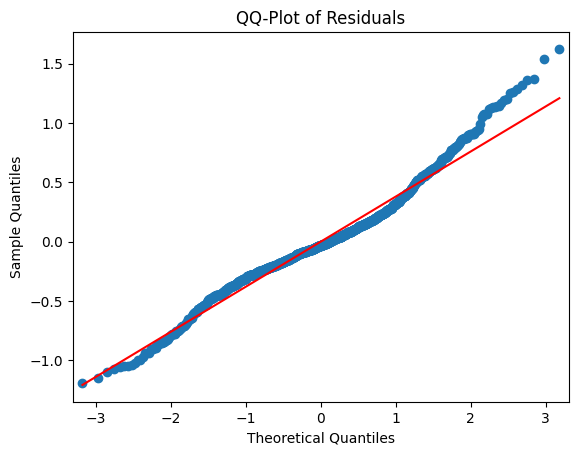

In [50]:
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("QQ-Plot of Residuals")
plt.show()

In [51]:
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    area_log 
No. Observations:    1374       Method:                REML     
No. Groups:          3          Scale:                 0.1447   
Min. group size:     386        Log-Likelihood:        -630.0766
Max. group size:     500        Converged:             Yes      
Mean group size:     458.0                                      
----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept            -0.561    0.042 -13.474 0.000 -0.642 -0.479
C(condition)[T.50mM]  0.780    0.022  35.490 0.000  0.737  0.823
Group Var             0.005    0.013                            



In [52]:
dfs_merged.to_csv(os.path.join('Output','Areas_.csv'))